In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import scipy.optimize as sc
import plotly.graph_objects as go
import matplotlib.pyplot as plt
np.set_printoptions(precision=6, suppress=True)
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))

In [2]:
Stocks= ['AGCO', 'ALTM', 'CVLT', 'ENSG', 'INMD', 'KBWR', 'MITK', 'MODG', 'NAPA',
       'OLPX', 'OXM', 'PATK', 'PECO', 'PSCC', 'PSCH', 'PSCI', 'PSCM', 'PSCT',
       'PSCU', 'PSR', 'PUBM', 'RSPF', 'RSPG', 'SKY', 'SMTC', 'STEP', 'WINA']
start_date = '2021-04-21'
end_date = '2023-04-21'
Number_Trading_Days=252
Num_Portofolio=10000
Risk_Free=0.0463
Daily_RF = Risk_Free/Number_Trading_Days
print(len(Stocks))
print(Daily_RF)
# 'NXT','SPAXX','ACUR'

27
0.00018373015873015874


### MPT

[*********************100%%**********************]  27 of 27 completed


<function matplotlib.pyplot.show(close=None, block=None)>

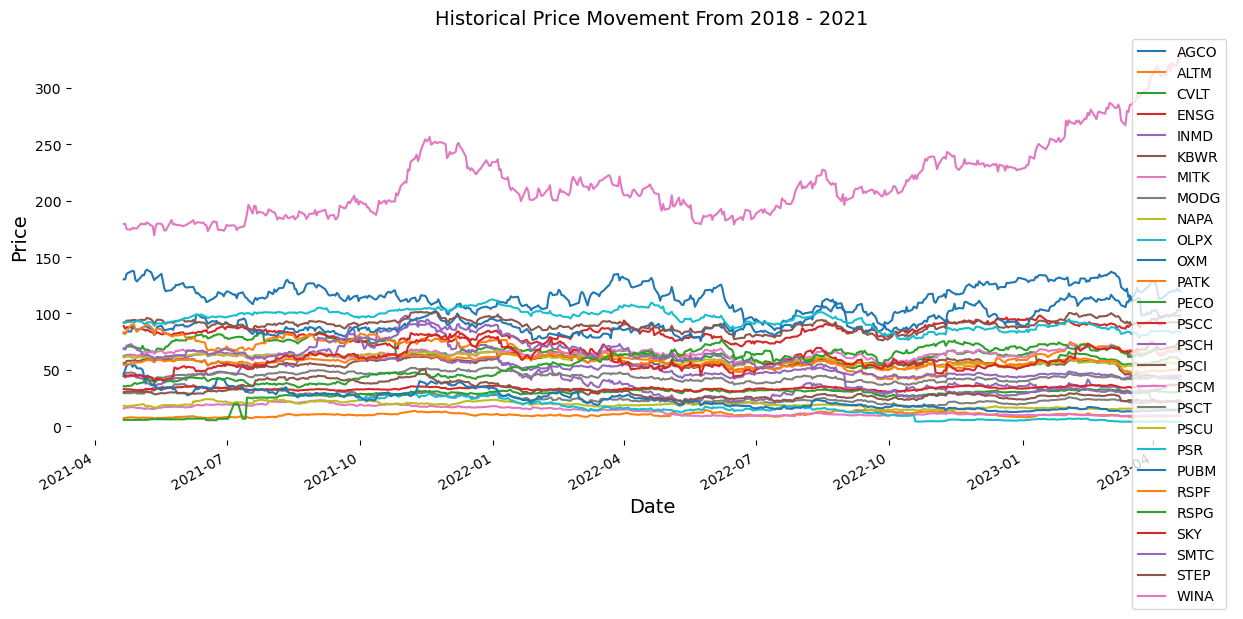

In [3]:
Data = yf.download(Stocks,start=start_date,end=end_date)['Adj Close']
Data.plot(figsize=(15,6))# width 20, height 10
plt.xlabel('Date',fontsize=14,)
plt.ylabel('Price',fontsize=14)
plt.xticks( fontsize = 10)
plt.yticks( fontsize = 10)
plt.title('Historical Price Movement From 2018 - 2021',fontsize=14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show

#### Compute Descriptive Statistics

In [4]:
log_return = np.log(Data / Data.shift(1))[1:]

In [5]:
log_return.corr()

,AGCO,ALTM,CVLT,ENSG,INMD,KBWR,MITK,MODG,NAPA,OLPX,...,PSCT,PSCU,PSR,PUBM,RSPF,RSPG,SKY,SMTC,STEP,WINA
AGCO,1.000000,0.441473,0.352397,0.309248,0.279377,0.568101,0.272171,0.407302,0.160541,0.192324,...,0.520024,0.449249,0.383050,0.213337,0.641477,0.513020,0.371539,0.331322,0.424279,0.271005
ALTM,0.441473,1.000000,0.269612,0.355089,0.458471,0.443340,0.282074,0.469506,0.208375,0.324741,...,0.598452,0.438042,0.413169,0.413599,0.516975,0.412295,0.451381,0.417196,0.470030,0.264592
CVLT,0.352397,0.269612,1.000000,0.271706,0.398570,0.370107,0.409987,0.376043,0.192580,0.221201,...,0.543265,0.393265,0.355776,0.325358,0.445910,0.227213,0.347720,0.375773,0.368933,0.230496
ENSG,0.309248,0.355089,0.271706,1.000000,0.321048,0.405825,0.230859,0.369995,0.185427,0.196506,...,0.504847,0.476537,0.448069,0.275851,0.426268,0.220912,0.363601,0.281821,0.355494,0.331510
INMD,0.279377,0.458471,0.398570,0.321048,1.000000,0.351429,0.417175,0.482133,0.283863,0.359511,...,0.614936,0.450717,0.442294,0.475248,0.460612,0.198689,0.444398,0.438359,0.512509,0.362518
KBWR,0.568101,0.443340,0.370107,0.405825,0.351429,1.000000,0.326004,0.466316,0.190233,0.289220,...,0.593798,0.600901,0.497979,0.293462,0.870280,0.475982,0.464959,0.383445,0.511130,0.400074
MITK,0.272171,0.282074,0.409987,0.230859,0.417175,0.326004,1.000000,0.388555,0.210785,0.275413,...,0.563300,0.449824,0.445533,0.386158,0.406596,0.193186,0.398082,0.381915,0.425993,0.291045
MODG,0.407302,0.469506,0.376043,0.369995,0.482133,0.466316,0.388555,1.000000,0.257935,0.433710,...,0.646179,0.448996,0.457918,0.392842,0.532586,0.294110,0.543908,0.413446,0.481934,0.402276
NAPA,0.160541,0.208375,0.192580,0.185427,0.283863,0.190233,0.210785,0.257935,1.000000,0.216457,...,0.360166,0.310710,0.351394,0.232941,0.256146,0.115109,0.278377,0.206121,0.300864,0.182413
OLPX,0.192324,0.324741,0.221201,0.196506,0.359511,0.289220,0.275413,0.433710,0.216457,1.000000,...,0.431352,0.344724,0.387641,0.277817,0.370845,0.132418,0.404298,0.292507,0.379762,0.227066


In [6]:
Annual_Return=np.array(log_return.mean()*Number_Trading_Days)
cov_matrix=log_return.cov() * Number_Trading_Days
Annual_Return

array([-0.04238 ,  0.120467, -0.083243,  0.050004, -0.086912, -0.123105,
       -0.28751 , -0.132362, -0.09367 , -1.200827,  0.110395, -0.098837,
        0.846853,  0.058615, -0.165127,  0.00448 ,  0.035844, -0.059324,
       -0.054706, -0.049085, -0.597343, -0.040268,  0.329274,  0.263228,
       -0.587403, -0.169312,  0.309504])

In [7]:
cov_matrix

,AGCO,ALTM,CVLT,ENSG,INMD,KBWR,MITK,MODG,NAPA,OLPX,...,PSCT,PSCU,PSR,PUBM,RSPF,RSPG,SKY,SMTC,STEP,WINA
AGCO,0.141036,0.107098,0.047818,0.033300,0.066773,0.059798,0.044640,0.068211,0.024201,0.070319,...,0.052327,0.030884,0.030230,0.058319,0.056344,0.067754,0.072938,0.062111,0.065788,0.030503
ALTM,0.107098,0.417276,0.062928,0.065769,0.188481,0.080268,0.079578,0.135247,0.054031,0.202425,...,0.103580,0.051797,0.056086,0.194479,0.078106,0.093660,0.152420,0.134527,0.125363,0.051226
CVLT,0.047818,0.062928,0.130554,0.028149,0.091652,0.037482,0.064697,0.060591,0.027931,0.078273,...,0.052595,0.026011,0.027014,0.085573,0.037683,0.028871,0.065677,0.067776,0.055040,0.024961
ENSG,0.033300,0.065769,0.028149,0.082213,0.058585,0.032614,0.028909,0.047309,0.021342,0.056347,...,0.038785,0.025012,0.026998,0.057574,0.028586,0.022275,0.054498,0.040337,0.042086,0.028489
INMD,0.066773,0.188481,0.091652,0.058585,0.405032,0.062687,0.115953,0.136831,0.072516,0.224055,...,0.104860,0.052508,0.059152,0.220164,0.068562,0.044469,0.147844,0.139262,0.134673,0.069148
KBWR,0.059798,0.080268,0.037482,0.032614,0.062687,0.078558,0.039906,0.058284,0.021402,0.077177,...,0.044593,0.030830,0.029331,0.059873,0.057050,0.046916,0.068124,0.053648,0.059151,0.033608
MITK,0.044640,0.079578,0.064697,0.028909,0.115953,0.039906,0.190739,0.075674,0.036952,0.118081,...,0.065916,0.035961,0.040890,0.122762,0.041532,0.029671,0.090883,0.083261,0.076817,0.038097
MODG,0.068211,0.135247,0.060591,0.047309,0.136831,0.058284,0.075674,0.198861,0.046171,0.182014,...,0.077208,0.036651,0.042912,0.127518,0.055548,0.046123,0.126791,0.092034,0.088735,0.053766
NAPA,0.024201,0.054031,0.027931,0.021342,0.072516,0.021402,0.036952,0.046171,0.161125,0.075904,...,0.038736,0.022830,0.029641,0.068063,0.024048,0.016249,0.058412,0.041301,0.049864,0.021945
OLPX,0.070319,0.202425,0.078273,0.056347,0.224055,0.077177,0.118081,0.182014,0.075904,0.890195,...,0.115445,0.062773,0.083034,0.185335,0.085561,0.044185,0.208496,0.147864,0.154928,0.065309


## Generate Portfolio

In [8]:
# def plotPoints(Annual_Return, cov_matrix):
#   portfolio_weight=[]
#   portfolio_return=[]
#   portfolio_risk=[]
#   portfolio_sharpe=[]
#   for _ in range(Num_Portofolio):# here we are going to generate 10,000 different weights.

#       w=np.random.random(len(Stocks))# 1 by 6 matrix,
#       w/=sum(w)# sum of the weight must add up to 1

#       portfolio_weight.append(w)# weight of six stocks
#       portfolio_return.append(np.sum(Annual_Return*w)) # return of the portfolio
#       portfolio_risk.append(np.sqrt(np.dot(w.T,np.dot(cov_matrix,w)))) # risk
#       portfolio_sharpe.append(portfolio_return[_]/portfolio_risk[_])
#   plt.figure(figsize=(15,6))
#   plt.scatter(portfolio_risk,portfolio_return,c=portfolio_sharpe,marker='.')
#   plt.colorbar(label='Sharpe Ratio')
#   #plt.plot(portfolio_risks_WithoutBound, target_returns, 'y-', label='Efficient Frontier')
#   plt.xlabel('Portfolio Risk')
#   plt.ylabel('Portfolio Return')
#   plt.title('Portfolio Distribution')
#   #plt.plot(portfolio_risks_WithoutBound[Optimal_Port_Index],target_returns[Optimal_Port_Index],'g*',c='red',markersize=10.0)
#   plt.gca().spines['right'].set_visible(False)
#   plt.gca().spines['top'].set_visible(False)
#   plt.gca().spines['left'].set_visible(False)
#   plt.gca().spines['bottom'].set_visible(False)
#   plt.legend()
#   plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


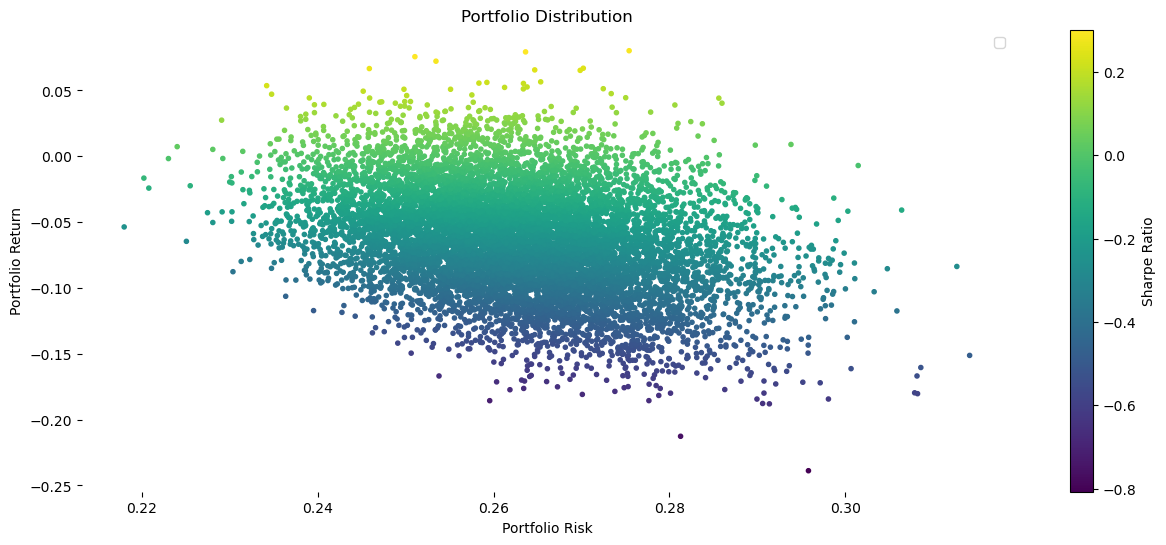

In [9]:
portfolio_weight=[]
portfolio_return=[]
portfolio_risk=[]
portfolio_sharpe=[]
for _ in range(Num_Portofolio):# here we are going to generate 10,000 different weights.

    w=np.random.random(len(Stocks))# 1 by 6 matrix,
    w/=sum(w)# sum of the weight must add up to 1

    portfolio_weight.append(w)# weight of six stocks
    portfolio_return.append(np.sum(log_return.mean()*w)*Number_Trading_Days) # return of the portfolio
    portfolio_risk.append(np.sqrt(np.dot(w.T,np.dot(log_return.cov()*Number_Trading_Days,w)))) # risk
    portfolio_sharpe.append(portfolio_return[_]/portfolio_risk[_])
plt.figure(figsize=(15,6))
plt.scatter(portfolio_risk,portfolio_return,c=portfolio_sharpe,marker='.')
plt.colorbar(label='Sharpe Ratio')
#plt.plot(portfolio_risks_WithoutBound, target_returns, 'y-', label='Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Return')
plt.title('Portfolio Distribution')
#plt.plot(portfolio_risks_WithoutBound[Optimal_Port_Index],target_returns[Optimal_Port_Index],'g*',c='red',markersize=10.0)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.legend()
plt.show()

## Portfolio Optimization

In [10]:
# Stocks = ['AAPL', 'BA', 'JPM', 'PEP', 'TGT', 'TSLA']
# target_returns = np.linspace(0.2, 0.4, 100)

# # Find the index for TSLA
# index_for_TSLA = Stocks.index('TSLA')

# bounds = []
# for i in range(len(Stocks)):
#     if i == index_for_TSLA:
#         bounds.append((0.10, 0.5))  # Minimum 10% for TSLA
#     else:
#         bounds.append((1/len(Stocks)*0.1, 0.5))  # Original bounds for others
# bounds = tuple(bounds)
# bounds

In [11]:

from scipy.optimize import minimize
def objective(weights): # This function will give us the risk of the portfolio
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Constraint functions
def return_constraint(weights):  ## This give us the difference of expected return and target return. In theory, we want it to be 0
    return np.dot(Annual_Return, weights) - target_return

def weight_constraint(weights):## we want the weight to be 0 always . This is our second constraint.
    return np.sum(weights) - 1
# Here we don't set a minimum weight and maximum weight for each stock
bounds = tuple((1/len(Stocks)*0.1, 0.5) for asset in range(len(Stocks)))
# Optimization
target_returns = np.linspace(0,0.25,100)
portfolio_risks_WithBound = []
optimal_weights=[]
init_guess=[1/len(Stocks) for _ in range(len(Stocks))]
for target_return in target_returns:
    constraints = [{'type': 'eq', 'fun': return_constraint},
                   {'type': 'eq', 'fun': weight_constraint}]

    result = minimize(objective,init_guess, bounds=bounds,constraints=constraints)
    portfolio_risks_WithBound.append(np.sqrt(result.fun))
    optimal_weights.append(result.x)

C:\Users\hzw10\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [12]:
Optimal_Port_Index=np.argmax(target_returns/np.array(portfolio_risks_WithBound))
Best_Weight=optimal_weights[Optimal_Port_Index]
Highest_Sharpe= target_returns[Optimal_Port_Index]  / portfolio_risks_WithBound[Optimal_Port_Index]
Portfolio_W = np.linspace(0.5, 2, 50)
RF_W = Portfolio_W - 1
CAL_Return = RF_W * Risk_Free  + Portfolio_W * (target_returns[Optimal_Port_Index])  # subtract 0 because risk at Rf is 0
CAL_Risk = Portfolio_W * portfolio_risks_WithBound[Optimal_Port_Index]

C:\Users\hzw10\AppData\Local\Temp\ipykernel_14516\4248630737.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g*" (-> color='g'). The keyword argument will take precedence.
  plt.plot(portfolio_risks_WithBound[Optimal_Port_Index],target_returns[Optimal_Port_Index],'g*',c='red',markersize=10.0)


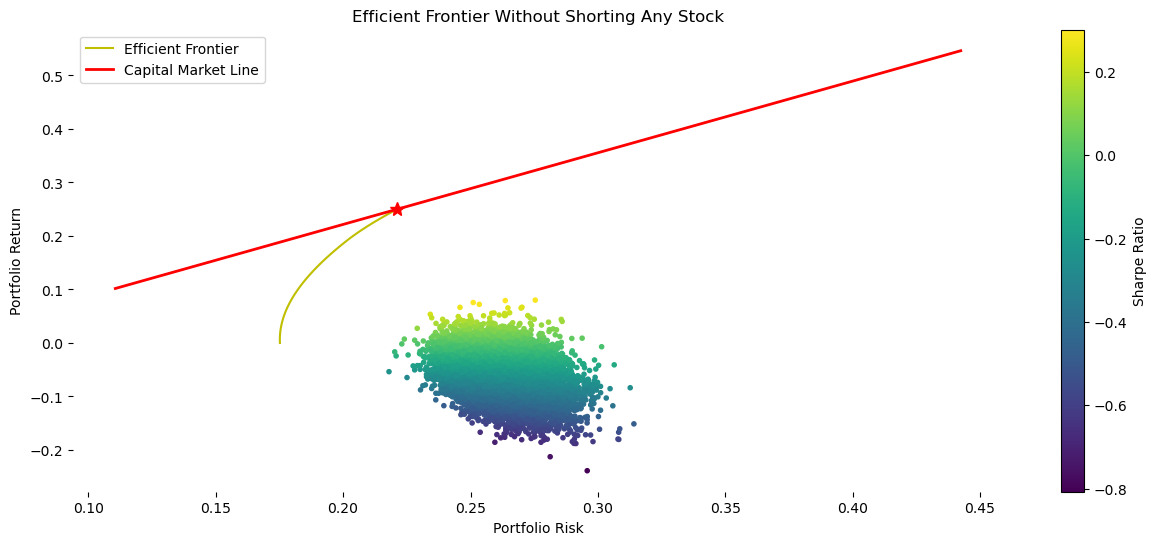

In [13]:
plt.figure(figsize=(15,6))
plt.scatter(portfolio_risk,portfolio_return,c=portfolio_sharpe,marker='.')
plt.colorbar(label='Sharpe Ratio')
plt.plot(portfolio_risks_WithBound, target_returns, 'y-', label='Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier Without Shorting Any Stock')
plt.plot(portfolio_risks_WithBound[Optimal_Port_Index],target_returns[Optimal_Port_Index],'g*',c='red',markersize=10.0)
plt.plot(CAL_Risk, CAL_Return, color='red', linestyle='-', linewidth=2, label='Capital Market Line')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.legend()
plt.show()

In [14]:
print(f"Optimal Portfolio Weights for {target_returns[Optimal_Port_Index]*100 :.2f}% target return:")
for i, weight in enumerate(optimal_weights[Optimal_Port_Index]):
    print(f"{Stocks[i]}: {weight*100:.2f}%")
print(f"Risk Optimal Portfolio Weights for Optimal target return: {portfolio_risks_WithBound[Optimal_Port_Index]*100:.2f}% ")

Optimal Portfolio Weights for 25.00% target return:
AGCO: 0.37%
ALTM: 0.37%
CVLT: 0.37%
ENSG: 3.54%
INMD: 0.37%
KBWR: 0.37%
MITK: 0.37%
MODG: 0.37%
NAPA: 0.37%
OLPX: 0.37%
OXM: 0.37%
PATK: 0.37%
PECO: 3.56%
PSCC: 15.08%
PSCH: 0.37%
PSCI: 0.37%
PSCM: 0.37%
PSCT: 0.37%
PSCU: 0.37%
PSR: 0.37%
PUBM: 0.37%
RSPF: 0.37%
RSPG: 30.22%
SKY: 0.37%
SMTC: 0.37%
STEP: 0.37%
WINA: 39.45%
Risk Optimal Portfolio Weights for Optimal target return: 22.12% 


In [15]:
optimal_weights[Optimal_Port_Index]

array([0.003704, 0.003704, 0.003704, 0.035425, 0.003704, 0.003704,
       0.003704, 0.003704, 0.003704, 0.003704, 0.003704, 0.003704,
       0.035602, 0.150815, 0.003704, 0.003704, 0.003704, 0.003704,
       0.003704, 0.003704, 0.003704, 0.003704, 0.302182, 0.003704,
       0.003704, 0.003704, 0.394496])

In [16]:
# def EF_Portfolio(cov_matrix, Annual_Return, minTargetReturns):
#   portfolio_weight=[]
#   portfolio_return=[]
#   portfolio_risk=[]
#   portfolio_sharpe=[]
#   for _ in range(Num_Portofolio):# here we are going to generate 10,000 different weights.

#       w=np.random.random(len(Stocks))# 1 by 6 matrix,
#       w/=sum(w)# sum of the weight must add up to 1

#       portfolio_weight.append(w)# weight of six stocks
#       portfolio_return.append(np.sum(Annual_Return*w)) # return of the portfolio
#       portfolio_risk.append(np.sqrt(np.dot(w.T,np.dot(cov_matrix,w)))) # risk
#       portfolio_sharpe.append(portfolio_return[_]/portfolio_risk[_])

#   target_returns, optimal_weights, portfolio_risks_WithBound = portfolioOptimization(cov_matrix, Annual_Return, minTargetReturns)
#   Optimal_Port_Index=np.argmax(target_returns/np.array(portfolio_risks_WithBound))
#   Best_Weight=optimal_weights[Optimal_Port_Index]
#   Highest_Sharpe= target_returns[Optimal_Port_Index]  / portfolio_risks_WithBound[Optimal_Port_Index]
#   Portfolio_W = np.linspace(0.5, 2, 50)
#   RF_W = Portfolio_W - 1
#   CAL_Return = RF_W * Risk_Free  + Portfolio_W * (target_returns[Optimal_Port_Index])  # subtract 0 because risk at Rf is 0
#   CAL_Risk = Portfolio_W * portfolio_risks_WithBound[Optimal_Port_Index]

#   plt.figure(figsize=(15,6))
#   plt.scatter(portfolio_risk,portfolio_return,c=portfolio_sharpe,marker='.')
#   plt.colorbar(label='Sharpe Ratio')
#   plt.plot(portfolio_risks_WithBound, target_returns, 'y-', label='Efficient Frontier')
#   plt.xlabel('Portfolio Risk')
#   plt.ylabel('Portfolio Return')
#   plt.title('Efficient Frontier Without Shorting Any Stock')
#   plt.plot(portfolio_risks_WithBound[Optimal_Port_Index],target_returns[Optimal_Port_Index],'g*',c='red',markersize=10.0)
#   plt.plot(CAL_Risk, CAL_Return, color='red', linestyle='-', linewidth=2, label='Capital Market Line')
#   plt.gca().spines['right'].set_visible(False)
#   plt.gca().spines['top'].set_visible(False)
#   plt.gca().spines['left'].set_visible(False)
#   plt.gca().spines['bottom'].set_visible(False)
#   plt.legend()
#   plt.show()

# Black Litterman Portfolio

In [17]:
market_prices = yf.download("^RUT", start=start_date, end=end_date)["Adj Close"]
market_prices

[*********************100%%**********************]  1 of 1 completed


Date
2021-04-21   2239.629883
2021-04-22   2232.610107
2021-04-23   2271.860107
2021-04-26   2298.010010
2021-04-27   2301.270020
                 ...    
2023-04-14   1781.150024
2023-04-17   1802.839966
2023-04-18   1795.550049
2023-04-19   1799.439941
2023-04-20   1789.699951
Name: Adj Close, Length: 504, dtype: float64

In [18]:
portfolio = yf.download(Stocks,start=start_date, end=end_date)['Adj Close']
portfolio.head()

[*********************100%%**********************]  27 of 27 completed


,AGCO,ALTM,CVLT,ENSG,INMD,KBWR,MITK,MODG,NAPA,OLPX,...,PSCT,PSCU,PSR,PUBM,RSPF,RSPG,SKY,SMTC,STEP,WINA
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-21,130.277237,7.140482,68.720001,88.861366,44.139999,56.057468,15.710000,29.459999,18.120001,NaN,...,46.400768,61.274982,92.075294,46.619999,54.626247,35.461834,44.650002,68.959999,30.195236,179.500305
2021-04-22,130.250839,7.423109,68.459999,86.429665,43.119999,55.404125,16.180000,29.139999,17.889999,NaN,...,46.070881,61.444427,91.723816,49.830002,53.964798,35.113262,44.630001,67.949997,30.204395,179.327347
2021-04-23,135.220886,7.560266,70.699997,87.719948,43.939999,57.888622,16.410000,29.290001,17.770000,NaN,...,47.277134,61.990440,92.167786,53.830002,55.051460,35.571907,44.599998,71.250000,30.671326,174.775665
2021-04-26,137.226532,7.896924,70.669998,87.958168,44.200001,57.989841,16.780001,29.209999,18.080000,NaN,...,47.597023,61.369118,92.352760,55.750000,55.259342,35.957165,45.349998,72.790001,30.808661,174.338669
2021-04-27,137.754303,7.776392,70.519997,87.700096,45.029999,58.229088,16.940001,29.580000,18.030001,NaN,...,47.343781,60.672493,92.204803,52.689999,55.627861,36.397449,45.029999,71.370003,30.634706,175.968201


In [19]:
r
var
Risk_Free

NameError: name 'r' is not defined

In [19]:
# # Implied Excess Equilibrium Returns Vector
# rets = np.log(market_prices / market_prices.shift(1)).dropna()
# r = rets.mean() * Number_Trading_Days
# var = rets.var() * (Number_Trading_Days ) # We need to check whether the variance should be frequency^2 ->  variance is freq^2, var(aX) = a^2 * var(X)
# risk_aversion_coeff = (r - Risk_Free) / var
# risk_aversion_coeff
risk_aversion_coeff = 2.5

In [20]:
blm_log_returns =np.log(portfolio / portfolio.shift(1))[1:]
blm_log_returns

,AGCO,ALTM,CVLT,ENSG,INMD,KBWR,MITK,MODG,NAPA,OLPX,...,PSCT,PSCU,PSR,PUBM,RSPF,RSPG,SKY,SMTC,STEP,WINA
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-22,-0.000203,0.038818,-0.003791,-0.027747,-0.023379,-0.011723,0.029478,-0.010922,-0.012774,NaN,...,-0.007135,0.002762,-0.003825,0.066588,-0.012183,-0.009878,-0.000448,-0.014755,0.000303,-0.000964
2021-04-23,0.037448,0.018308,0.032196,0.014818,0.018838,0.043867,0.014115,0.005134,-0.006730,NaN,...,0.025846,0.008847,0.004829,0.077214,0.019936,0.012977,-0.000672,0.047423,0.015341,-0.025710
2021-04-26,0.014723,0.043567,-0.000424,0.002712,0.005900,0.001747,0.022297,-0.002735,0.017295,NaN,...,0.006743,-0.010073,0.002005,0.035046,0.003769,0.010772,0.016676,0.021384,0.004468,-0.002503
2021-04-27,0.003839,-0.015381,-0.002125,-0.002938,0.018604,0.004117,0.009490,0.012587,-0.002769,NaN,...,-0.005335,-0.011416,-0.001603,-0.056452,0.006647,0.012170,-0.007081,-0.019701,-0.005662,0.009304
2021-04-28,-0.002814,0.006393,-0.010979,0.004404,-0.013527,-0.003166,-0.014868,0.007410,0.011031,NaN,...,-0.004798,-0.000776,-0.002310,0.021777,0.004069,0.041225,-0.008699,-0.010706,0.010406,-0.004147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-14,0.004618,-0.000919,-0.005059,0.000711,-0.006522,-0.024720,-0.011822,0.000893,-0.012799,-0.022087,...,-0.008035,-0.017011,-0.016314,-0.020834,0.000393,0.002498,-0.001430,-0.029581,-0.014770,0.021634
2023-04-17,0.007046,0.040105,-0.001637,-0.001626,0.003538,0.030204,-0.004334,-0.004923,0.003384,-0.030229,...,-0.002455,0.003883,0.020696,0.002803,0.011538,-0.014238,0.027252,0.049120,-0.009675,-0.009999
2023-04-18,0.011764,0.005726,-0.014194,-0.001832,-0.014227,-0.026603,-0.007629,0.016022,0.009415,-0.002561,...,-0.005645,-0.015267,-0.003343,0.002097,0.003106,0.002106,0.024628,0.012238,-0.024604,0.019483


In [21]:
Portfolio_COV = blm_log_returns.cov() * Number_Trading_Days

 # should the above be frequency^2? -> I think it should be: cov(aX, bY) = ab * cov(X,Y)
 # in this case,  daily % change * 252 =  yearly % change
 # cov(252 * AAPL daily % change, 252 * MSFT daily % change) = 252 * 252 * cov(AAPL daily % change, MSFT daily % change)
Portfolio_COV

,AGCO,ALTM,CVLT,ENSG,INMD,KBWR,MITK,MODG,NAPA,OLPX,...,PSCT,PSCU,PSR,PUBM,RSPF,RSPG,SKY,SMTC,STEP,WINA
AGCO,0.141036,0.107098,0.047818,0.033300,0.066773,0.059798,0.044640,0.068211,0.024201,0.070319,...,0.052327,0.030884,0.030230,0.058319,0.056344,0.067754,0.072938,0.062111,0.065788,0.030503
ALTM,0.107098,0.417276,0.062928,0.065769,0.188481,0.080268,0.079578,0.135247,0.054031,0.202425,...,0.103580,0.051797,0.056086,0.194479,0.078106,0.093660,0.152420,0.134527,0.125363,0.051226
CVLT,0.047818,0.062928,0.130554,0.028149,0.091652,0.037482,0.064697,0.060591,0.027931,0.078273,...,0.052595,0.026011,0.027014,0.085573,0.037683,0.028871,0.065677,0.067776,0.055040,0.024961
ENSG,0.033300,0.065769,0.028149,0.082213,0.058585,0.032614,0.028909,0.047309,0.021342,0.056347,...,0.038785,0.025012,0.026998,0.057574,0.028586,0.022275,0.054498,0.040337,0.042086,0.028489
INMD,0.066773,0.188481,0.091652,0.058585,0.405032,0.062687,0.115953,0.136831,0.072516,0.224055,...,0.104860,0.052508,0.059152,0.220164,0.068562,0.044469,0.147844,0.139262,0.134673,0.069148
KBWR,0.059798,0.080268,0.037482,0.032614,0.062687,0.078558,0.039906,0.058284,0.021402,0.077177,...,0.044593,0.030830,0.029331,0.059873,0.057050,0.046916,0.068124,0.053648,0.059151,0.033608
MITK,0.044640,0.079578,0.064697,0.028909,0.115953,0.039906,0.190739,0.075674,0.036952,0.118081,...,0.065916,0.035961,0.040890,0.122762,0.041532,0.029671,0.090883,0.083261,0.076817,0.038097
MODG,0.068211,0.135247,0.060591,0.047309,0.136831,0.058284,0.075674,0.198861,0.046171,0.182014,...,0.077208,0.036651,0.042912,0.127518,0.055548,0.046123,0.126791,0.092034,0.088735,0.053766
NAPA,0.024201,0.054031,0.027931,0.021342,0.072516,0.021402,0.036952,0.046171,0.161125,0.075904,...,0.038736,0.022830,0.029641,0.068063,0.024048,0.016249,0.058412,0.041301,0.049864,0.021945
OLPX,0.070319,0.202425,0.078273,0.056347,0.224055,0.077177,0.118081,0.182014,0.075904,0.890195,...,0.115445,0.062773,0.083034,0.185335,0.085561,0.044185,0.208496,0.147864,0.154928,0.065309


In [22]:
# ## Compute Implied Portfolio Return
# mcaps = {}
# for t in Stocks:
#     stock = yf.Ticker(t)
#     mcaps[t] = stock.info["marketCap"]
# mcaps = pd.Series(mcaps)
# mkt_weights = mcaps / mcaps.sum()
# implied_excess_equilibrium_returns = risk_aversion_coeff * Portfolio_COV.dot(mkt_weights)
# implied_excess_equilibrium_returns

In [23]:
implied_excess_equilibrium_returns = Annual_Return

In [24]:
# yf.Ticker('PSCU').info['marketCap']

## CAPM Return

In [25]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats

# Function to get historical data
def get_historical_data(tickers, start_date, end_date):
    data = yf.download(tickers, start=start_date, end=end_date)
    return data['Adj Close']

# Function to calculate daily returns
def calculate_returns(data):
    returns = data.pct_change().dropna()
    return returns

# Function to calculate betas
def calculate_betas(returns, market):
    betas = {}
    for ticker in returns.columns:
        if ticker != market:
            beta, _, _, _, _ = stats.linregress(returns[market], returns[ticker])
            betas[ticker] = beta
    return betas

# Function to compute CAPM return
def compute_capm_return(risk_free_rate, market_return, betas):
    capm_returns = {ticker: risk_free_rate + beta * (market_return - risk_free_rate)
                    for ticker, beta in betas.items()}
    return capm_returns

# Main function to use the above functions
def capm_analysis(stock_symbols, market_symbol, risk_free_rate,  start_date, end_date):
    # Get historical data for stocks and market index
    tickers = stock_symbols + [market_symbol]
    data = get_historical_data(tickers, start_date, end_date)

    market_return = np.mean(np.log(data['^GSPC']/data['^GSPC'].shift(1)).dropna()) * 252
    # Calculate daily returns
    returns = calculate_returns(data)

    # Calculate betas for each stock
    betas = calculate_betas(returns, market_symbol)

    # Compute CAPM returns
    capm_returns = compute_capm_return(risk_free_rate, market_return, betas)

    # Store everything in a DataFrame
    results = pd.DataFrame({
        'Beta': betas,
        'CAPM Return': capm_returns
    })

    return results

# Example usage
stock_symbols = Stocks  # List of stock symbols
market_symbol = '^GSPC'  # S&P 500 index symbol
risk_free_rate = 0.0463  # Risk-free rate (e.g., yield on 10-year Treasury bond)
start_date = '2018-01-01'
end_date = '2021-12-30'

# Run CAPM analysis
capm_results = capm_analysis(stock_symbols, market_symbol, risk_free_rate, start_date, end_date)
capm_results
# print(capm_results)
# """
# # It seems we're experiencing some technical difficulties. Let's try running the function again.

# def compute_capm_return(risk_free_rate, market_return, betas):


#     # Calculate CAPM return for each stock
#     capm_returns = {stock: risk_free_rate + beta * (market_return - risk_free_rate)
#                     for stock, beta in betas.items()}

#     return capm_returns

# # Example data
# risk_free_rate = 0.03  # 3%
# market_return = 0.10   # 10%
# betas = {
#     t:yf.Ticker(t).info.get('beta') for t in stock_symbols
# }

# # Calculate the CAPM return for the example stocks
# capm_returns = compute_capm_return(risk_free_rate, market_return, betas)
# capm_returns
# """

[*********************100%%**********************]  28 of 28 completed


,Beta,CAPM Return
AGCO,1.195682,0.163473
ALTM,2.312603,0.272928
CVLT,1.205773,0.164462
ENSG,1.086546,0.152778
INMD,2.321556,0.273806
KBWR,0.916424,0.136107
MITK,1.359361,0.179513
MODG,1.926169,0.235059
NAPA,0.284099,0.074141
OLPX,1.124442,0.156492


## Fama French Return

In [26]:
import pandas_datareader.data as web
import datetime as dt
import statsmodels.api as sm

# Set start and end dates for the data
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 12, 31)

def get_ff_factors(start_date, end_date):
  ff_factors = web.DataReader('F-F_Research_Data_Factors_daily', 'famafrench', start_date, end_date)[0]
  ff_factors.columns = [col.lower() for col in ff_factors.columns]

  ff_factors = ff_factors / 100
  ff_factors = ff_factors.rename(columns = {'mkt-rf': 'mkt'})
  ff_factors['mkt'] += ff_factors['rf']

  return ff_factors


def fama_french_analysis(stock_symbols, market_symbol, start_date, end_date):
    # Get historical data for stocks and market index
    tickers = stock_symbols + [market_symbol]
    stock_data = get_historical_data(tickers, start_date, end_date)

    # Get Fama-French factors data
    ff_factors = get_ff_factors(start_date, end_date)

    # Calculate daily log returns for stocks and market index
    stock_log_returns = np.log(stock_data / stock_data.shift(1)).dropna()

    # Align dates and join stock returns with Fama-French factors
    all_data = stock_log_returns.join(ff_factors, how='inner')

    # Store regression results
    regression_results = {}

    # Perform regression for each stock against the Fama-French factors
    for ticker in stock_symbols:
        y = all_data[ticker]  # Excess returns = stock returns - risk-free rate
        X = all_data[['mkt', 'smb', 'hml']]   # MKT is the market factor, SMB and HML as provided
        X = sm.add_constant(X)  # Adds a constant term to the predictor

        model = sm.OLS(y, X).fit()
        regression_results[ticker] = model.params


    # Convert results to DataFrame
    results_df = pd.DataFrame(regression_results)

    return results_df


# Example usage
# ... Define stock_symbols, market_symbol, start_date, end_date as before ...
# Run Fama-French three-factor analysis
ff_results = fama_french_analysis(stock_symbols, market_symbol, start_date, end_date)
#print(ff_results)
ff_results

[*********************100%%**********************]  28 of 28 completed


,AGCO,ALTM,CVLT,ENSG,INMD,KBWR,MITK,MODG,NAPA,OLPX,...,PSCT,PSCU,PSR,PUBM,RSPF,RSPG,SKY,SMTC,STEP,WINA
const,-0.002611,-0.000511,-0.001833,0.001817,-0.003060,-0.000341,-0.002602,-0.001471,-0.000039,-0.000192,...,0.000804,0.000059,0.001753,0.002641,-0.000947,-0.000789,0.003252,0.000916,-0.002181,0.001569
mkt,1.263831,1.904178,0.960230,0.836871,1.889521,0.891467,1.176407,1.642401,0.185171,1.066541,...,1.058832,0.680928,0.581554,1.533911,1.174796,1.399109,1.559718,1.383369,1.236997,0.992573
smb,0.422063,1.027803,0.898389,1.339303,1.329039,0.964804,-0.136188,1.289190,0.236840,-0.609776,...,0.597675,0.558809,0.243445,1.278669,0.031152,0.460924,1.253119,0.557995,0.225969,0.530199
hml,0.926676,-0.424718,0.071979,0.511213,-1.213788,1.025001,-0.571945,0.203803,-0.010831,-0.755276,...,-0.038517,0.322754,0.171386,-0.251558,0.671327,1.121586,0.630509,-0.335869,0.103769,0.252596


In [27]:
mkt = 0.236
smb = -0.0389
hml = 0.2549
FF_Return = {}
for stock in stock_symbols:
  FF_Return[stock] =  ff_results[stock]['const'] + mkt * ff_results[stock]['mkt'] + smb * ff_results[stock]['smb'] + hml * ff_results[stock]['hml']

FF_Return

{'AGCO': 0.5154446492450786,
 'ALTM': 0.30063272101870053,
 'CVLT': 0.20818116565661424,
 'ENSG': 0.2775275495556966,
 'INMD': 0.08177307787485244,
 'KBWR': 0.43378686969179037,
 'MITK': 0.13453918559507458,
 'MODG': 0.3879353226507543,
 'NAPA': 0.031687505174321846,
 'OLPX': 0.08271175634469582,
 'OXM': 0.3217248315948561,
 'PATK': 0.18972903635436839,
 'PECO': 0.3273989201271477,
 'PSCC': 0.14179173095952477,
 'PSCH': 0.10007377024984451,
 'PSCI': 0.379480578510051,
 'PSCM': 0.3203980233361119,
 'PSCT': 0.21762115765741216,
 'PSCU': 0.22129074721537348,
 'PSR': 0.17321661675320027,
 'PUBM': 0.25078152218019906,
 'RSPF': 0.4462139396101856,
 'RSPG': 0.5973635721490783,
 'SKY': 0.48331588758555194,
 'SMTC': 0.22007249240683746,
 'STEP': 0.3074114457370545,
 'WINA': 0.2795785353218543}

In [28]:
# Generate views (P, Q, omega)
# tau_scalar = 4
# P = []
# Q = []
# omega_values = []
# omega = []
def insert_absolute_view(stock_symbol,view_value):
  global omega
  index = stock_symbols.index(stock_symbol)
  if(index == -1):
    return
  view_config_row = [0] * len(stock_symbols)
  view_config_row[index] = 1
  Q.append(view_value)
  P.append(view_config_row)
  omega_values.append((np.array(view_config_row) @ Portfolio_COV @ np.array(view_config_row)))#* tau_scalar
  omega = np.diag(omega_values)

def insert_relative_view(better_mini_portfolio, worse_mini_portfolio, view_value):
  global omega
  view_config_row = [0] * len(stock_symbols)

  better_mkt_cap = sum([yf.Ticker(t).info['marketCap'] for t in better_mini_portfolio])
  for t in better_mini_portfolio:
    index = stock_symbols.index(t)
    if(index == -1):
      return
    view_config_row[index] = yf.Ticker(t).info['marketCap'] / better_mkt_cap

  worse_mkt_cap = sum([yf.Ticker(t).info['marketCap'] for t in worse_mini_portfolio])
  for t in worse_mini_portfolio:
    index = stock_symbols.index(t)
    if(index == -1):
      return
    view_config_row[index] = - yf.Ticker(t).info['marketCap'] / worse_mkt_cap
  Q.append(view_value)
  P.append(view_config_row)
  omega_values.append((np.array(view_config_row) @ Portfolio_COV @ np.array(view_config_row)) * tau_scalar)
  omega = np.diag(omega_values)

# insert_absolute_view('AAPL',0.40)
# insert_absolute_view('TSLA',0.15)
# insert_relative_view(['AAPL'],['TSLA'],0.5)


In [29]:
def get_combined_return_vector(tau_scalar,cov_matrix,P,omega,implied_eq_returns,Q):
  first_half = np.linalg.inv(np.linalg.inv(tau_scalar * Portfolio_COV) + np.transpose(P) @ np.linalg.inv(omega) @ P)
  second_half = (np.linalg.inv(tau_scalar * cov_matrix) @ implied_eq_returns) + (np.transpose(P) @ np.linalg.inv(omega) @ Q)
  ans = first_half @ second_half
  return pd.Series({Stocks[i]:ans[i] for i in range(0,len(Stocks))}), first_half

# CAPM + Black Litterman Model

In [30]:
tau_scalar = 1.5
P = []
Q = []
omega_values = []
omega = []
for i in range(len(Stocks)):
  insert_absolute_view(Stocks[i],capm_results['CAPM Return'][i])


In [31]:
CAPM_BLM_Return , CAPM_Covariance = get_combined_return_vector(tau_scalar, Portfolio_COV, P, omega, implied_excess_equilibrium_returns, Q)

In [32]:
implied_excess_equilibrium_returns

array([-0.04238 ,  0.120467, -0.083243,  0.050004, -0.086912, -0.123105,
       -0.28751 , -0.132362, -0.09367 , -1.200827,  0.110395, -0.098837,
        0.846853,  0.058615, -0.165127,  0.00448 ,  0.035844, -0.059324,
       -0.054706, -0.049085, -0.597343, -0.040268,  0.329274,  0.263228,
       -0.587403, -0.169312,  0.309504])

In [33]:
CAPM_BLM_Return

AGCO    0.106676
ALTM    0.375719
CVLT    0.145913
ENSG    0.159920
INMD    0.354195
KBWR    0.049892
MITK    0.079555
MODG    0.166396
NAPA    0.057419
OLPX   -0.281941
OXM     0.243475
PATK    0.073000
PECO    0.458507
PSCC    0.142606
PSCH    0.058627
PSCI    0.133797
PSCM    0.162744
PSCT    0.180164
PSCU    0.084275
PSR     0.097044
PUBM    0.018728
RSPF    0.123276
RSPG    0.310389
SKY     0.436154
SMTC   -0.065053
STEP    0.156906
WINA    0.268420
dtype: float64

In [34]:
CAPM_Covariance

array([[ 0.063888,  0.006801,  0.003334,  0.00026 , -0.001629,  0.003741,
        -0.000091,  0.003188, -0.001378, -0.006522,  0.001793,  0.003351,
         0.000413,  0.001847, -0.000903,  0.005854,  0.007893,  0.001848,
         0.000181, -0.000459, -0.004509,  0.005784,  0.008463,  0.000148,
        -0.000048,  0.00366 , -0.001671],
       [ 0.006801,  0.192923, -0.004223,  0.003246,  0.017997,  0.000791,
        -0.00373 ,  0.008687, -0.000438,  0.011892, -0.001459, -0.005049,
        -0.002696,  0.00083 ,  0.003496,  0.003404,  0.015814,  0.007851,
        -0.000494,  0.000347,  0.020778,  0.001962,  0.009172,  0.008904,
         0.007621,  0.00776 , -0.002653],
       [ 0.003334, -0.004223,  0.067062,  0.000199,  0.007796,  0.000579,
         0.007167,  0.002402,  0.000146, -0.002122,  0.003597,  0.00218 ,
         0.005356,  0.001036,  0.002486,  0.001044,  0.001266,  0.004883,
         0.000252,  0.000164,  0.005563,  0.002053, -0.000364,  0.000652,
         0.004198,  0.001015

## Fama French 3 BLM

In [35]:
tau_scalar = 1.5
P = []
Q = []
omega_values = []
omega = []
for i in range(len(Stocks)):
  insert_absolute_view(Stocks[i],FF_Return[Stocks[i]])


In [36]:
P

[[1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0

In [37]:
omega

array([[0.141036, 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      ],
       [0.      , 0.417276, 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.130554, 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
        0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , 0.082213, 0.      , 0.      ,

In [38]:
FAMA_BLM_Return , FAMA_Covariance = get_combined_return_vector(tau_scalar, Portfolio_COV, P, omega, implied_excess_equilibrium_returns, Q)

In [39]:
FAMA_BLM_Return

AGCO    0.400436
ALTM    0.518255
CVLT    0.202304
ENSG    0.250302
INMD    0.279448
KBWR    0.294101
MITK    0.083329
MODG    0.294426
NAPA    0.039316
OLPX   -0.291625
OXM     0.398437
PATK    0.234279
PECO    0.633086
PSCC    0.223884
PSCH    0.098648
PSCI    0.308500
PSCM    0.356272
PSCT    0.258724
PSCU    0.166145
PSR     0.166409
PUBM    0.032317
RSPF    0.324984
RSPG    0.617768
SKY     0.625128
SMTC   -0.014840
STEP    0.278614
WINA    0.374996
dtype: float64

In [40]:
FAMA_Covariance

array([[ 0.063888,  0.006801,  0.003334,  0.00026 , -0.001629,  0.003741,
        -0.000091,  0.003188, -0.001378, -0.006522,  0.001793,  0.003351,
         0.000413,  0.001847, -0.000903,  0.005854,  0.007893,  0.001848,
         0.000181, -0.000459, -0.004509,  0.005784,  0.008463,  0.000148,
        -0.000048,  0.00366 , -0.001671],
       [ 0.006801,  0.192923, -0.004223,  0.003246,  0.017997,  0.000791,
        -0.00373 ,  0.008687, -0.000438,  0.011892, -0.001459, -0.005049,
        -0.002696,  0.00083 ,  0.003496,  0.003404,  0.015814,  0.007851,
        -0.000494,  0.000347,  0.020778,  0.001962,  0.009172,  0.008904,
         0.007621,  0.00776 , -0.002653],
       [ 0.003334, -0.004223,  0.067062,  0.000199,  0.007796,  0.000579,
         0.007167,  0.002402,  0.000146, -0.002122,  0.003597,  0.00218 ,
         0.005356,  0.001036,  0.002486,  0.001044,  0.001266,  0.004883,
         0.000252,  0.000164,  0.005563,  0.002053, -0.000364,  0.000652,
         0.004198,  0.001015

In [41]:
## Optimization, Determine the best portfolio

## Optimization, Determine the best portfolio

### Optimization for CAPM

In [42]:

from scipy.optimize import minimize
def objective(weights): # This function will give us the risk of the portfolio
    return np.dot(weights.T, np.dot(CAPM_Covariance, weights))

# Constraint functions
def return_constraint(weights):  ## This give us the difference of expected return and target return. In theory, we want it to be 0
    return np.dot(CAPM_BLM_Return, weights) - target_return

def weight_constraint(weights):## we want the weight to be 0 always . This is our second constraint.
    return np.sum(weights) - 1
# Here we don't set a minimum weight and maximum weight for each stock
#bounds = tuple((1/len(Stocks)*0.1, 0.5) for asset in range(len(Stocks)))
bounds = tuple((0, 0.5) for asset in range(len(Stocks)))
# Optimization
target_returns = np.linspace(0.1,max(CAPM_BLM_Return),100)
portfolio_risks_With_CAPM = []
optimal_weights_CAPM=[]
init_guess=[1/len(Stocks) for _ in range(len(Stocks))]
for target_return in target_returns:
    constraints = [{'type': 'eq', 'fun': return_constraint},
                   {'type': 'eq', 'fun': weight_constraint}]

    result = minimize(objective,init_guess, bounds=bounds,constraints=constraints)
    portfolio_risks_With_CAPM.append(np.sqrt(result.fun))
    optimal_weights_CAPM.append(result.x)

In [43]:
Optimal_Port_Index_CAPM=np.argmax(target_returns/np.array(portfolio_risks_With_CAPM))
Best_Weight_CAPM=optimal_weights_CAPM[Optimal_Port_Index_CAPM]
Highest_Sharpe_CAPM= target_returns[Optimal_Port_Index_CAPM]  / portfolio_risks_With_CAPM[Optimal_Port_Index_CAPM]
# Portfolio_W = np.linspace(0.5, 2, 50)
# RF_W = Portfolio_W - 1
# CAL_Return = RF_W * Risk_Free  + Portfolio_W * (target_returns[Optimal_Port_Index])  # subtract 0 because risk at Rf is 0
# CAL_Risk = Portfolio_W * portfolio_risks_WithBound[Optimal_Port_Index]

In [44]:
print(f"Optimal Portfolio Weights for {target_returns[Optimal_Port_Index_CAPM]*100 :.2f}% target return:")
for i, weight in enumerate(optimal_weights_CAPM[Optimal_Port_Index_CAPM]):
    print(f"{Stocks[i]}: {weight*100:.2f}%")
print(f"Risk Optimal Portfolio Weights for Optimal target return: {portfolio_risks_With_CAPM[Optimal_Port_Index_CAPM]*100:.2f}% ")

Optimal Portfolio Weights for 21.23% target return:
AGCO: 0.24%
ALTM: 2.58%
CVLT: 3.39%
ENSG: 6.27%
INMD: 3.18%
KBWR: 0.00%
MITK: 0.14%
MODG: 0.69%
NAPA: 0.36%
OLPX: 0.00%
OXM: 4.97%
PATK: 0.00%
PECO: 0.84%
PSCC: 15.25%
PSCH: 0.00%
PSCI: 0.00%
PSCM: 4.43%
PSCT: 10.84%
PSCU: 5.70%
PSR: 5.04%
PUBM: 0.00%
RSPF: 6.03%
RSPG: 10.85%
SKY: 6.33%
SMTC: 0.00%
STEP: 2.48%
WINA: 10.39%
Risk Optimal Portfolio Weights for Optimal target return: 7.07% 


### Optimization For FAMA

In [45]:

from scipy.optimize import minimize
def objective(weights): # This function will give us the risk of the portfolio
    return np.dot(weights.T, np.dot(FAMA_Covariance, weights))

# Constraint functions
def return_constraint(weights):  ## This give us the difference of expected return and target return. In theory, we want it to be 0
    return np.dot(FAMA_BLM_Return, weights) - target_return

def weight_constraint(weights):## we want the weight to be 0 always . This is our second constraint.
    return np.sum(weights) - 1
# Here we don't set a minimum weight and maximum weight for each stock
bounds = tuple((1/len(Stocks) *0.1, 0.5) for asset in range(len(Stocks)))
# Optimization
target_returns = np.linspace(0.1,max(FAMA_BLM_Return),100)
portfolio_risks_With_FAMA = []
optimal_weights_FAMA=[]
init_guess=[1/len(Stocks) for _ in range(len(Stocks))]
for target_return in target_returns:
    constraints = [{'type': 'eq', 'fun': return_constraint},
                   {'type': 'eq', 'fun': weight_constraint}]

    result = minimize(objective,init_guess, bounds=bounds,constraints=constraints)
    portfolio_risks_With_FAMA.append(np.sqrt(result.fun))
    optimal_weights_FAMA.append(result.x)

C:\Users\hzw10\anaconda3\lib\site-packages\scipy\optimize\_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


In [46]:
Optimal_Port_Index_FAMA=np.argmax(target_returns/np.array(portfolio_risks_With_FAMA))
Best_Weight_FAMA=optimal_weights_FAMA[Optimal_Port_Index_FAMA]
Highest_Sharpe_FAMA= target_returns[Optimal_Port_Index_FAMA]  / portfolio_risks_With_FAMA[Optimal_Port_Index_FAMA]
# Portfolio_W = np.linspace(0.5, 2, 50)
# RF_W = Portfolio_W - 1
# CAL_Return = RF_W * Risk_Free  + Portfolio_W * (target_returns[Optimal_Port_Index])  # subtract 0 because risk at Rf is 0
# CAL_Risk = Portfolio_W * portfolio_risks_WithBound[Optimal_Port_Index]

In [47]:
print(f"Optimal Portfolio Weights for {target_returns[Optimal_Port_Index_FAMA]*100 :.2f}% target return:")
for i, weight in enumerate(optimal_weights_FAMA[Optimal_Port_Index_FAMA]):
    print(f"{Stocks[i]}: {weight*100:.2f}%")
print(f"Risk Optimal Portfolio Weights for Optimal target return: {portfolio_risks_With_FAMA[Optimal_Port_Index_FAMA]*100:.2f}% ")

Optimal Portfolio Weights for 33.69% target return:
AGCO: 3.56%
ALTM: 1.49%
CVLT: 2.18%
ENSG: 5.25%
INMD: 1.03%
KBWR: 2.57%
MITK: 0.37%
MODG: 1.29%
NAPA: 0.37%
OLPX: 0.37%
OXM: 4.03%
PATK: 0.57%
PECO: 0.61%
PSCC: 10.36%
PSCH: 0.37%
PSCI: 5.46%
PSCM: 6.43%
PSCT: 5.99%
PSCU: 6.53%
PSR: 4.04%
PUBM: 0.37%
RSPF: 11.19%
RSPG: 10.59%
SKY: 4.70%
SMTC: 0.37%
STEP: 2.30%
WINA: 7.60%
Risk Optimal Portfolio Weights for Optimal target return: 6.66% 


## Backtesting

In [72]:
start_date = '2023-04-25'
end_date = '2024-04-25'

In [73]:
BUFC_Weight = np.array(
    [0.00, 0.84, 2.31, 0.76, 0.94, 1.86, 5.41, 2.51, 1.42, 2.93, 1.78, 6.02,
    4.73, 1.92, 6.39, 1.98, 4.05, 2.12, 3.55, 4.64, 1.57, 4.91,
    4.22, 10.27, 3.47, 2.55, 3.23, 1.19, 7.04
])/100

In [74]:
BUFC_Stock = np.array([
    "ACUR",
    "ALTM",
    "INMD",
    "OLPX",
    "SMTC",
    "MODG",
    "KBWR",
    "PSCU",
    "OXM",
    "MITK",
    "PECO",
    "PSCT",
    "PSR",
    "NAPA",
    'PSCH',
    "AGCO",
    "PSCC",
    "NXT",
    "SKY",
    "STEP",
    "CVLT",
    'RSPG',
    'RSPF',
    'PSCI',
    'PSCM',
    'PUBM',
    'PATK',
    'WINA',
    'ENSG'
])


In [75]:
stock_weight_dict = {ticker: weight for ticker, weight in zip(BUFC_Stock, BUFC_Weight)}
sorted_stock_weight_dict = {k: stock_weight_dict[k] for k in sorted(stock_weight_dict)}
sorted_stock_weight_dict

{'ACUR': 0.0,
 'AGCO': 0.019799999999999998,
 'ALTM': 0.0084,
 'CVLT': 0.015700000000000002,
 'ENSG': 0.0704,
 'INMD': 0.0231,
 'KBWR': 0.0541,
 'MITK': 0.029300000000000003,
 'MODG': 0.018600000000000002,
 'NAPA': 0.0192,
 'NXT': 0.0212,
 'OLPX': 0.0076,
 'OXM': 0.014199999999999999,
 'PATK': 0.0323,
 'PECO': 0.0178,
 'PSCC': 0.0405,
 'PSCH': 0.0639,
 'PSCI': 0.1027,
 'PSCM': 0.0347,
 'PSCT': 0.0602,
 'PSCU': 0.025099999999999997,
 'PSR': 0.0473,
 'PUBM': 0.0255,
 'RSPF': 0.042199999999999994,
 'RSPG': 0.049100000000000005,
 'SKY': 0.0355,
 'SMTC': 0.009399999999999999,
 'STEP': 0.0464,
 'WINA': 0.011899999999999999}

In [76]:
BUFC_Stock = list(sorted_stock_weight_dict.keys())

In [77]:
yf.download(BUFC_Stock, start=start_date, end=end_date)['Adj Close'].iloc[0]

[*********************100%%**********************]  29 of 29 completed


ACUR     0.050000
AGCO   116.785110
ALTM     8.678304
CVLT    58.080002
ENSG   101.660461
INMD    36.430000
KBWR    41.261116
MITK     8.780000
MODG    22.209999
NAPA    14.840000
NXT     32.689999
OLPX     3.630000
OXM     98.338104
PATK    65.932434
PECO    29.854826
PSCC    36.394943
PSCH    44.374443
PSCI    90.021950
PSCM    63.193623
PSCT    39.499802
PSCU    54.808399
PSR     82.512810
PUBM    13.530000
RSPF    48.774788
RSPG    67.262711
SKY     72.120003
SMTC    20.610001
STEP    21.698193
WINA   332.928284
Name: 2023-04-25 00:00:00, dtype: float64

In [78]:
BUFC_Stock_Data = yf.download(BUFC_Stock, start=start_date, end=end_date)['Adj Close']
BUFC_Stock_Daily = BUFC_Stock_Data.pct_change().dropna()
weighted_returns = BUFC_Stock_Daily.dot(list(sorted_stock_weight_dict.values()))
BUFC_Cumulative_Return = (weighted_returns + 1).cumprod()
BUFC_Cumulative_Return

[*********************100%%**********************]  29 of 29 completed


Date
2023-04-26   0.989491
2023-04-27   0.999592
2023-04-28   1.006620
2023-05-01   1.006366
2023-05-02   0.987482
               ...   
2024-04-18   1.127200
2024-04-19   1.137123
2024-04-22   1.144875
2024-04-23   1.158457
2024-04-24   1.157573
Length: 251, dtype: float64

In [79]:
BUFC_Stock_Daily

,ACUR,AGCO,ALTM,CVLT,ENSG,INMD,KBWR,MITK,MODG,NAPA,...,PSCT,PSCU,PSR,PUBM,RSPF,RSPG,SKY,SMTC,STEP,WINA
Date,,,,,,,,,,,,,,,,,,,,,
2023-04-26,0.000000,-0.003660,0.024425,-0.011019,-0.021396,0.005215,0.015009,0.014806,-0.004502,0.004717,...,-0.002193,-0.024793,-0.008928,-0.013304,-0.007015,-0.013907,-0.023295,-0.009704,-0.030756,-0.021311
2023-04-27,0.000000,0.003836,0.028985,0.013231,-0.035904,-0.000546,0.019408,0.000000,0.008141,0.012072,...,0.000930,0.014738,0.018727,0.041948,0.016754,0.004113,0.024418,-0.028417,-0.009973,-0.009298
2023-04-28,0.000000,0.007724,-0.007269,0.001203,0.009987,0.018033,0.012919,0.012346,-0.005384,0.000663,...,0.007349,0.004357,0.009540,-0.017973,0.013897,0.019459,0.027855,-0.017146,0.008700,0.001289
2023-05-01,0.000000,0.005567,-0.043936,0.001373,0.001648,0.008857,-0.026404,0.000000,-0.009923,0.013245,...,0.007295,0.000542,-0.005762,-0.002928,-0.008811,-0.005310,-0.000539,-0.012314,0.018157,-0.006229
2023-05-02,0.000000,0.026639,0.006223,0.053128,-0.022622,-0.100027,-0.054930,-0.008869,0.006378,-0.010458,...,-0.005993,-0.013008,-0.018430,-0.072687,-0.028447,-0.044294,-0.002023,-0.031688,-0.024521,0.013681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-18,0.000000,0.004215,0.010638,-0.005072,-0.011373,-0.006304,0.006427,-0.015612,-0.016592,-0.031515,...,0.000937,0.008672,0.000375,-0.001391,0.004863,-0.002198,-0.014508,-0.024650,0.012723,-0.006784
2024-04-19,2.571429,0.017305,0.026316,0.007647,0.015282,0.004037,0.027459,0.016695,0.012330,0.032541,...,-0.007487,0.014125,0.004748,0.003250,0.012348,0.010892,0.024264,-0.031201,-0.013400,0.048333
2024-04-22,0.000000,0.003537,-0.015385,0.007062,-0.008710,-0.015508,0.017609,0.041051,0.014103,0.013333,...,0.010844,0.007065,0.009202,0.025914,0.011868,0.006416,-0.005057,0.032850,0.025184,-0.014439


In [80]:

data = yf.download(Stocks, start=start_date, end=end_date)['Adj Close']
# Calculate the daily returns
daily_returns = data.pct_change().dropna()
# Weight the daily returns
daily_returns['MPT Return']= daily_returns[Stocks].dot(optimal_weights[Optimal_Port_Index])
daily_returns['MPT Cumulative Return'] = (daily_returns['MPT Return'] + 1).cumprod()

daily_returns['CAPM Portfolio Return']= daily_returns[Stocks].dot(optimal_weights_CAPM[Optimal_Port_Index_CAPM])
daily_returns['CAPM Cumulative Portfolio Return'] = (daily_returns['CAPM Portfolio Return'] + 1).cumprod()

daily_returns['FAMA Portfolio Return']= daily_returns[Stocks].dot(optimal_weights_FAMA[Optimal_Port_Index_FAMA])
daily_returns['FAMA Cumulative Portfolio Return'] = (daily_returns['FAMA Portfolio Return'] + 1).cumprod()


[*********************100%%**********************]  27 of 27 completed


In [81]:
equal_weights = np.full(len(Stocks), 1/len(Stocks))
Equal_Weight = (daily_returns[Stocks].dot(equal_weights) + 1).cumprod()

[*********************100%%**********************]  27 of 27 completed


<function matplotlib.pyplot.show(close=None, block=None)>

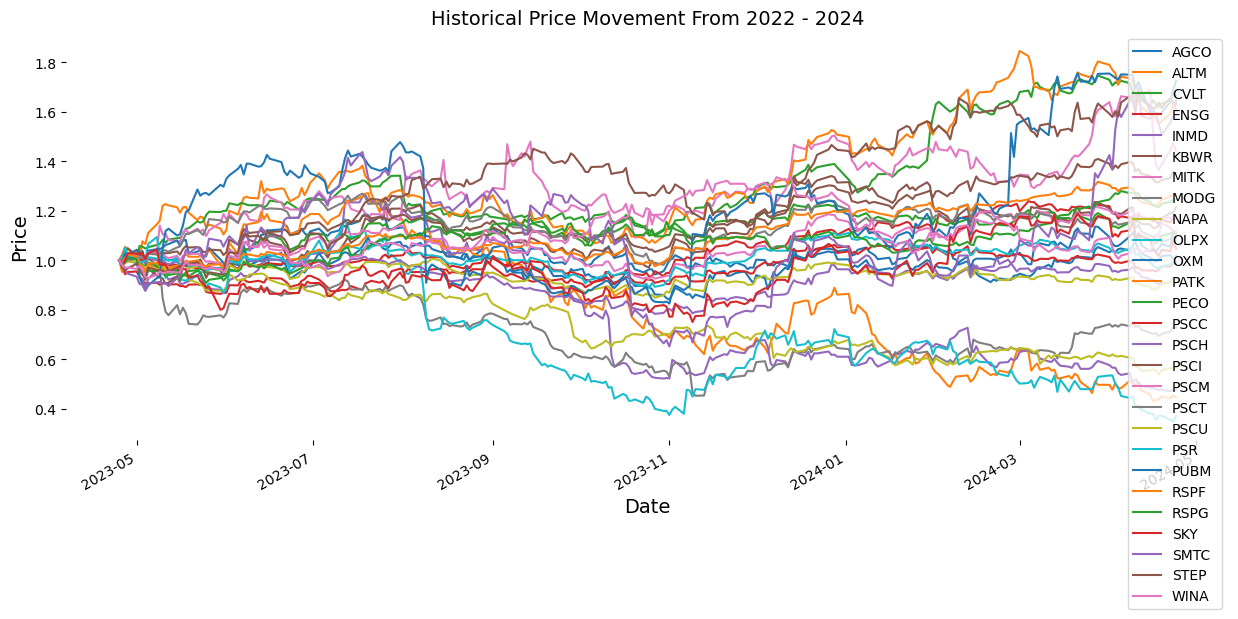

In [82]:
Data = yf.download(Stocks,start=start_date,end=end_date)['Adj Close']
Data = Data/Data.iloc[0]
Data.plot(figsize=(15,6))# width 20, height 10
plt.xlabel('Date',fontsize=14,)
plt.ylabel('Price',fontsize=14)
plt.xticks( fontsize = 10)
plt.yticks( fontsize = 10)
plt.title('Historical Price Movement From 2022 - 2024',fontsize=14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show

Text(0.5, 1.0, 'Strategy Peformance vs Current Holding')

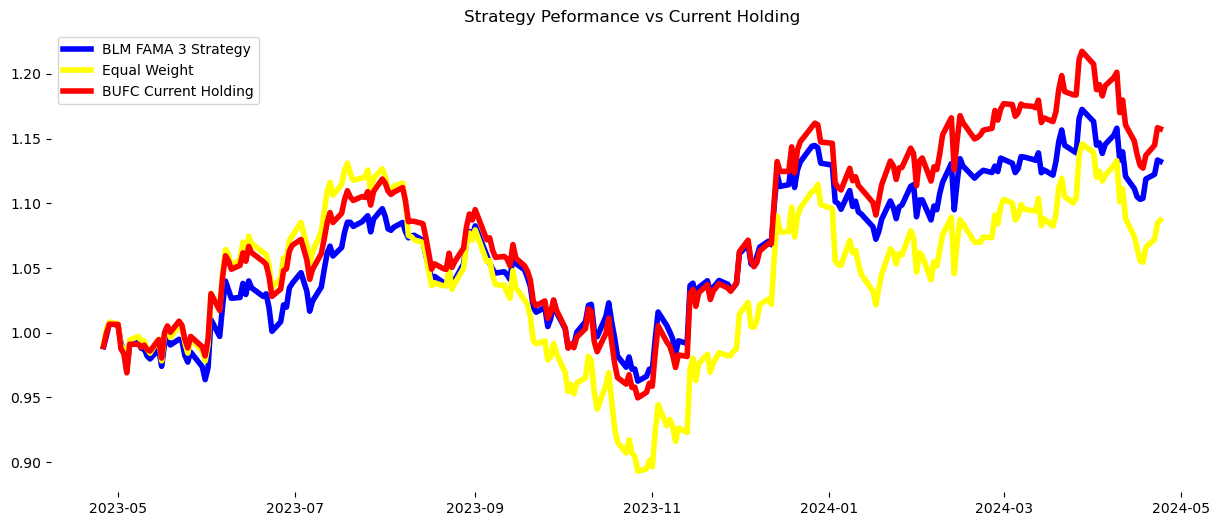

In [83]:
plt.figure(figsize=(15,6))
plt.plot(daily_returns['FAMA Cumulative Portfolio Return'],label="BLM FAMA 3 Strategy", lw = 4, color= 'blue')
plt.plot((daily_returns[Stocks].dot(equal_weights) + 1).cumprod(),label="Equal Weight", lw = 4, color= 'yellow')
plt.plot(BUFC_Cumulative_Return, label="BUFC Current Holding", lw = 4, color= 'red')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.title("Strategy Peformance vs Current Holding")

In [85]:
BUFC_Cumulative_Return

Date
2023-04-26   0.989491
2023-04-27   0.999592
2023-04-28   1.006620
2023-05-01   1.006366
2023-05-02   0.987482
               ...   
2024-04-18   1.127200
2024-04-19   1.137123
2024-04-22   1.144875
2024-04-23   1.158457
2024-04-24   1.157573
Length: 251, dtype: float64